In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
conn = sqlite3.connect('data.db')
table1 = "test_table"
table2 = "time_cnt"
cmd = f'''
SELECT "{table1}".run_id,monitor_tag,workers,tasks_per_trial,trial,"{table1}".app_name,average_time FROM "{table1}"
JOIN "{table2}"
ON '{table1}'.run_id = '{table2}'.run_id
'''
tasks = pd.read_sql_query(cmd, conn)
tasks

,run_id,monitor_tag,workers,tasks_per_trial,trial,app_name,average_time
0,877d8b9f-8637-4407-9f8f-53499669a655,htex,1,10,1,noop,0.000122
1,eb520051-90a6-449a-8feb-735ee8c36bb1,htex,1,10,1,sleep10ms,0.000117
2,f9172dd4-f7c3-46a9-8d18-7a6bb72e1c06,htex,1,10,1,sleep100ms,0.000121
3,e173305b-8059-453a-9274-64a4fa4980b2,diaspora,1,10,1,noop,0.170543
4,0687f89a-9d8c-4272-b65e-93e55362d77c,diaspora,1,10,1,sleep10ms,0.048661
...,...,...,...,...,...,...,...
475,7ea76e83-5156-4c44-9385-645022b511cb,htex,128,1280,10,sleep10ms,0.000043
476,88f1dd9f-e338-4ca2-9172-81bdfb90af27,htex,128,1280,10,sleep100ms,0.000081
477,9e1d4a31-21d2-4b97-a26b-4a938314d6c0,diaspora,128,1280,10,noop,0.000170
478,165fa65b-c653-4039-8c3d-063fb285e75b,diaspora,128,1280,10,sleep10ms,0.000169


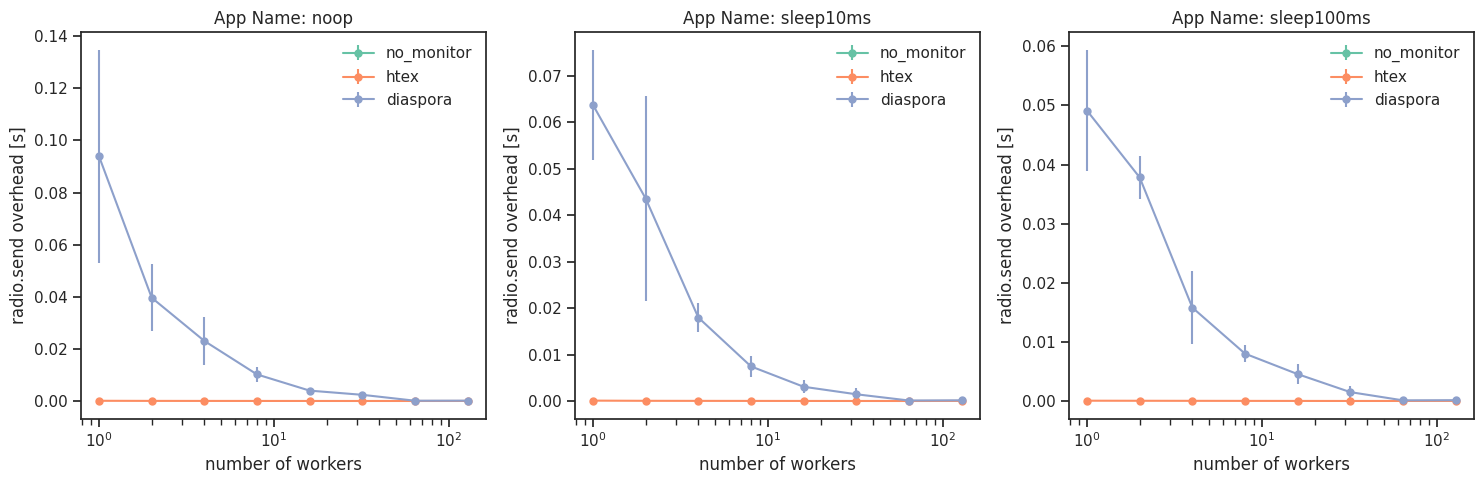

In [3]:
# strong scaling
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['average_time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'average_time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['average_time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('radio.send overhead [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')

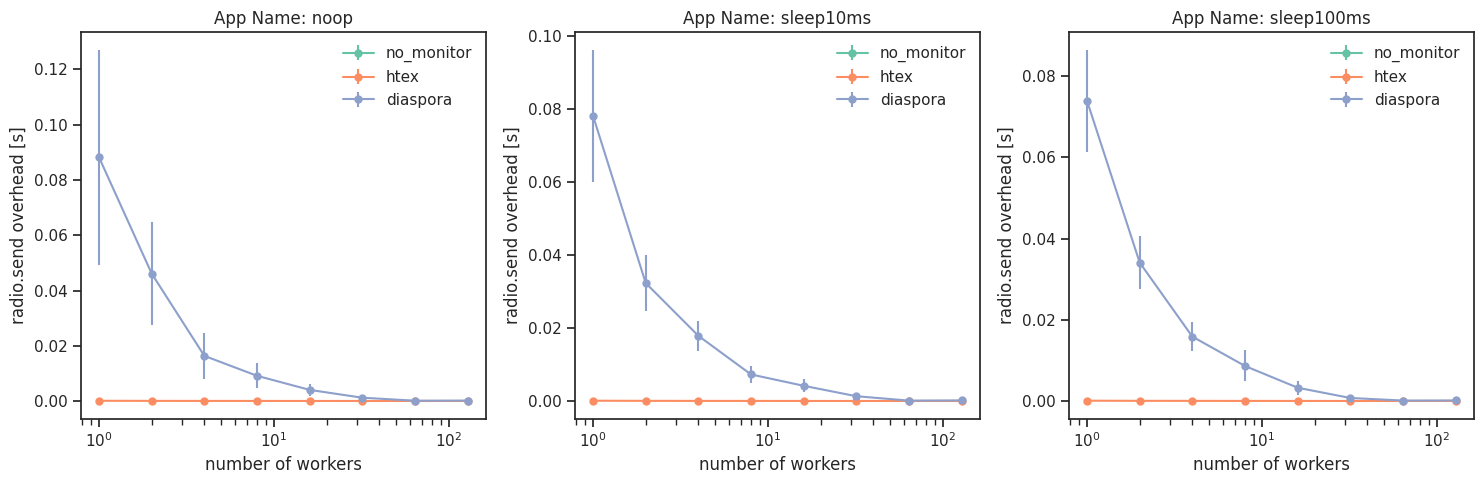

In [3]:
# weak scaling
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['average_time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'average_time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['average_time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('radio.send overhead [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')